In [1]:
import pandas as pd

In [2]:
reunions = (
    pd
    .read_csv('out/reunions.csv')
    .set_index('uid')
)

In [3]:
scrutins = (
    pd
    .read_csv('out/scrutins.csv')
    .assign(
        identiques = lambda df: df.objet.str.contains('identique'),
        amendement = lambda df: df.objet.str.contains('amendement'),
        sous_amendement = lambda df: df.objet.str.contains('sous-amendement')
    )
    .join(reunions[['cr']], on='seance')
    .assign(
        url_scrutin = lambda df: df.uid.apply(lambda id: f'https://www2.assemblee-nationale.fr/scrutins/detail/(legislature)/16/(num)/{id.replace("VTANR5L16V", "")}'),
        url_seance = lambda df: df.cr.apply(lambda id: f'https://www.assemblee-nationale.fr/dyn/16/comptes-rendus/seance/{id}'),
    )
)

scrutins

,uid,objet,type,date,seance,sort,identiques,amendement,sous_amendement,cr,url_scrutin,url_seance
0,VTANR5L16V375,l'amendement n° 609 de M. Guedj après l'articl...,scrutin public ordinaire,2022-10-25,RUANR5L16S2023IDS26461,rejeté,False,True,False,CRSANR5L16S2023O1N032,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1,VTANR5L16V791,le sous-amendement n° 3228 de M. Fournier à l'...,scrutin public ordinaire,2022-12-14,RUANR5L16S2023IDS26639,rejeté,False,True,True,CRSANR5L16S2023O1N101,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
2,VTANR5L16V67,l'amendement de suppression n° 213 de Mme Bath...,scrutin public ordinaire,2022-07-21,RUANR5L16S2022IDS26212,rejeté,True,True,False,CRSANR5L16S2022E1N015,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
3,VTANR5L16V1147,l'amendement n° 7 de Mme Garin et l'amendement...,scrutin public ordinaire,2023-03-08,RUANR5L16S2023IDS26863,rejeté,True,True,False,CRSANR5L16S2023O1N172,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
4,VTANR5L16V709,l'amendement n° 2886 de Mme Laernoes à l'artic...,scrutin public ordinaire,2022-12-08,RUANR5L16S2023IDS26604,rejeté,False,True,False,CRSANR5L16S2023O1N090,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
...,...,...,...,...,...,...,...,...,...,...,...,...
1805,VTANR5L16V1409,l'ensemble du projet de loi relatif aux jeux O...,scrutin public ordinaire,2023-04-11,RUANR5L16S2023IDS26997,adopté,False,False,False,CRSANR5L16S2023O1N210,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1806,VTANR5L16V300,l'amendement n° 424 de M. Boucard après l'arti...,scrutin public ordinaire,2022-10-14,RUANR5L16S2023IDS26395,rejeté,False,True,False,CRSANR5L16S2023O1N019,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1807,VTANR5L16V492,l'amendement n° 303 de M. Pancher à l'article ...,scrutin public ordinaire,2022-10-31,RUANR5L16S2023IDS26425,rejeté,False,True,False,CRSANR5L16S2023O1N043,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1808,VTANR5L16V1376,le sous-amendement n° 107 de M. Meizonnet à l'...,scrutin public ordinaire,2023-04-06,RUANR5L16S2023IDS26966,rejeté,True,True,True,CRSANR5L16S2023O1N206,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...


In [4]:
organes = (pd.read_csv('out/organes.csv'))

In [5]:
organes

,@xmlns,@xmlns:xsi,@xsi:type,uid,codeType,libelle,libelleEdition,libelleAbrege,libelleAbrev,viMoDe,...,regime,legislature,regimeJuridique,siteInternet,nombreReunionsAnnuelles,secretariat,listePays,positionPolitique,preseance,couleurAssociee
0,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeExtraParlementaire_type,PO528198,ORGEXTPARL,Conseil supérieur des gens de mer,du Conseil supérieur des gens de mer,Gens de mer,291,"{'dateDebut': '2011-12-30', 'dateAgrement': No...",...,5ème République,NaN,Article L. 5581-1 du code des transports,NaN,3.0,NaN,NaN,NaN,NaN,NaN
1,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaire_Type,PO810595,GE,Adoption,ADOPTION,ADOPTION,ADOPTION,"{'dateDebut': None, 'dateAgrement': '2022-12-0...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': 'M. Pierre-Michel Berillon', ...",NaN,NaN,NaN,NaN
2,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaireInternational,PO808026,GA,France-Haïti,de France-Haïti,Haïti,HAI,"{'dateDebut': None, 'dateAgrement': '2022-06-2...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': 'M. Éric Fournier', 'secretai...",{'paysRef': 'GOP756561'},NaN,NaN,NaN
3,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeExtraParlementaire_type,PO418452,ORGEXTPARL,Conseil supérieur des archives,du Conseil supérieur des archives,Archives,246,"{'dateDebut': '2008-07-15', 'dateAgrement': No...",...,5ème République,NaN,Article L. 211-2-1 du code du patrimoine,https://francearchives.fr/fr/,2.0,NaN,NaN,NaN,NaN,NaN
4,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaireInternational,PO807146,GA,France-Soudan,de France-Soudan,Soudan,SOUD,"{'dateDebut': None, 'dateAgrement': '2022-06-2...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",{'paysRef': 'GOP756532'},NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaireInternational,PO807856,GA,France-Andorre,de France-Andorre,Andorre,AND,"{'dateDebut': None, 'dateAgrement': '2022-06-2...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': 'M. Julien Souplet', 'secreta...",{'paysRef': 'GOP756420'},NaN,NaN,NaN
639,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaireInternational,PO808196,GA,France-Belgique,de France-Belgique,Belgique,BEL,"{'dateDebut': None, 'dateAgrement': '2022-06-2...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': 'Mme Claire Moisset', 'secret...",{'paysRef': 'GOP756421'},NaN,NaN,NaN
640,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaire_Type,PO808282,GE,Industries de défense,INDUSTRIES DE DÉFENSE,INDUSTRIES DE DÉFENSE,INDUSDEFEN,"{'dateDebut': None, 'dateAgrement': '2022-12-0...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': 'M. Bertrand Vial', 'secretai...",NaN,NaN,NaN,NaN
641,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaire_Type,PO819609,MISINFO,Mission d'information sur la situation démogra...,de la mission d'information sur la situation d...,Situation démographique des outre-mer et maint...,DEMOGRAPOM,"{'dateDebut': '2022-10-11', 'dateAgrement': No...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN


In [6]:
groupe = (
    organes
    .query('libelleAbrev == "RN" and codeType ==  "GP"')
)

groupe.uid

236    PO800520
Name: uid, dtype: object

In [7]:
votes = pd.read_csv('out/votes.csv')

In [8]:
deputes = (
    votes
    .query('organe == @groupe.uid.iloc[0]')
    .groupby('acteurRef')
    .agg({
        'scrutin': 'count'
    })
    .join(pd.read_csv('out/acteurs.csv').set_index('uid'))
    .sort_values('scrutin', ascending=False)
    .dropna(subset=['nom'])
)

deputes

,scrutin,nom,prenom,civ
acteurRef,,,,
PA795900,1267,Hamelet,Marine,Mme
PA793166,1264,Dessigny,Jocelyn,M.
PA794638,1257,Catteau,Victor,M.
PA794954,1207,Salmon,Emeric,M.
PA793928,1196,Diaz,Edwige,Mme
...,...,...,...,...
PA794354,380,Laporte,Hélène,Mme
PA720468,376,Chenu,Sébastien,M.
PA796110,327,Hébrard,Joris,M.


In [9]:
scrutins

,uid,objet,type,date,seance,sort,identiques,amendement,sous_amendement,cr,url_scrutin,url_seance
0,VTANR5L16V375,l'amendement n° 609 de M. Guedj après l'articl...,scrutin public ordinaire,2022-10-25,RUANR5L16S2023IDS26461,rejeté,False,True,False,CRSANR5L16S2023O1N032,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1,VTANR5L16V791,le sous-amendement n° 3228 de M. Fournier à l'...,scrutin public ordinaire,2022-12-14,RUANR5L16S2023IDS26639,rejeté,False,True,True,CRSANR5L16S2023O1N101,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
2,VTANR5L16V67,l'amendement de suppression n° 213 de Mme Bath...,scrutin public ordinaire,2022-07-21,RUANR5L16S2022IDS26212,rejeté,True,True,False,CRSANR5L16S2022E1N015,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
3,VTANR5L16V1147,l'amendement n° 7 de Mme Garin et l'amendement...,scrutin public ordinaire,2023-03-08,RUANR5L16S2023IDS26863,rejeté,True,True,False,CRSANR5L16S2023O1N172,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
4,VTANR5L16V709,l'amendement n° 2886 de Mme Laernoes à l'artic...,scrutin public ordinaire,2022-12-08,RUANR5L16S2023IDS26604,rejeté,False,True,False,CRSANR5L16S2023O1N090,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
...,...,...,...,...,...,...,...,...,...,...,...,...
1805,VTANR5L16V1409,l'ensemble du projet de loi relatif aux jeux O...,scrutin public ordinaire,2023-04-11,RUANR5L16S2023IDS26997,adopté,False,False,False,CRSANR5L16S2023O1N210,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1806,VTANR5L16V300,l'amendement n° 424 de M. Boucard après l'arti...,scrutin public ordinaire,2022-10-14,RUANR5L16S2023IDS26395,rejeté,False,True,False,CRSANR5L16S2023O1N019,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1807,VTANR5L16V492,l'amendement n° 303 de M. Pancher à l'article ...,scrutin public ordinaire,2022-10-31,RUANR5L16S2023IDS26425,rejeté,False,True,False,CRSANR5L16S2023O1N043,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1808,VTANR5L16V1376,le sous-amendement n° 107 de M. Meizonnet à l'...,scrutin public ordinaire,2023-04-06,RUANR5L16S2023IDS26966,rejeté,True,True,True,CRSANR5L16S2023O1N206,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...


In [10]:
scrutins_uniques_rn = (
    scrutins
    .query('~identiques')
    .query('objet.str.contains("|".join(@deputes.nom))')
)

scrutins_uniques_rn

,uid,objet,type,date,seance,sort,identiques,amendement,sous_amendement,cr,url_scrutin,url_seance
11,VTANR5L16V1235,l'amendement n° 513 de M. Jean-Philippe Tanguy...,scrutin public ordinaire,2023-03-16,RUANR5L16S2023IDS26894,rejeté,False,True,False,CRSANR5L16S2023O1N181,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
15,VTANR5L16V704,l'amendement n° 554 de Mme Mathilde Paris à l'...,scrutin public ordinaire,2022-12-08,RUANR5L16S2023IDS26604,rejeté,False,True,False,CRSANR5L16S2023O1N090,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
16,VTANR5L16V319,l'amendement n° 3248 de Mme Parmentier après l...,scrutin public ordinaire,2022-10-14,RUANR5L16S2023IDS26397,rejeté,False,True,False,CRSANR5L16S2023O1N021,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
18,VTANR5L16V694,l'amendement n° 2189 de M. de Fournas à l'arti...,scrutin public ordinaire,2022-12-07,RUANR5L16S2023IDS26602,rejeté,False,True,False,CRSANR5L16S2023O1N088,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
32,VTANR5L16V1183,l'amendement n° 351 de M. Meurin à l'article 1...,scrutin public ordinaire,2023-03-14,RUANR5L16S2023IDS26880,rejeté,False,True,False,CRSANR5L16S2023O1N176,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
...,...,...,...,...,...,...,...,...,...,...,...,...
1780,VTANR5L16V1185,l'amendement n° 591 de M. Dragon à l'article 1...,scrutin public ordinaire,2023-03-14,RUANR5L16S2023IDS26880,rejeté,False,True,False,CRSANR5L16S2023O1N176,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1793,VTANR5L16V307,l'amendement n° 585 de M. Meizonnet après l'ar...,scrutin public ordinaire,2022-10-14,RUANR5L16S2023IDS26396,rejeté,False,True,False,CRSANR5L16S2023O1N020,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1794,VTANR5L16V401,l'amendement n° 1883 de M. Schreck à l'article...,scrutin public ordinaire,2022-10-27,RUANR5L16S2023IDS26418,rejeté,False,True,False,CRSANR5L16S2023O1N036,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1798,VTANR5L16V578,l'amendement n° 880 de Mme Roullaud à l'articl...,scrutin public ordinaire,2022-11-16,RUANR5L16S2023IDS26502,rejeté,False,True,False,CRSANR5L16S2023O1N055,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...


In [11]:
scrutins_uniques_rn_amd = (
    scrutins
    .query('~identiques')
    .query('~sous_amendement')
    .query('objet.str.contains("|".join(@deputes.nom))')
)

scrutins_uniques_rn_amd

,uid,objet,type,date,seance,sort,identiques,amendement,sous_amendement,cr,url_scrutin,url_seance
11,VTANR5L16V1235,l'amendement n° 513 de M. Jean-Philippe Tanguy...,scrutin public ordinaire,2023-03-16,RUANR5L16S2023IDS26894,rejeté,False,True,False,CRSANR5L16S2023O1N181,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
15,VTANR5L16V704,l'amendement n° 554 de Mme Mathilde Paris à l'...,scrutin public ordinaire,2022-12-08,RUANR5L16S2023IDS26604,rejeté,False,True,False,CRSANR5L16S2023O1N090,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
16,VTANR5L16V319,l'amendement n° 3248 de Mme Parmentier après l...,scrutin public ordinaire,2022-10-14,RUANR5L16S2023IDS26397,rejeté,False,True,False,CRSANR5L16S2023O1N021,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
18,VTANR5L16V694,l'amendement n° 2189 de M. de Fournas à l'arti...,scrutin public ordinaire,2022-12-07,RUANR5L16S2023IDS26602,rejeté,False,True,False,CRSANR5L16S2023O1N088,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
32,VTANR5L16V1183,l'amendement n° 351 de M. Meurin à l'article 1...,scrutin public ordinaire,2023-03-14,RUANR5L16S2023IDS26880,rejeté,False,True,False,CRSANR5L16S2023O1N176,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
...,...,...,...,...,...,...,...,...,...,...,...,...
1780,VTANR5L16V1185,l'amendement n° 591 de M. Dragon à l'article 1...,scrutin public ordinaire,2023-03-14,RUANR5L16S2023IDS26880,rejeté,False,True,False,CRSANR5L16S2023O1N176,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1793,VTANR5L16V307,l'amendement n° 585 de M. Meizonnet après l'ar...,scrutin public ordinaire,2022-10-14,RUANR5L16S2023IDS26396,rejeté,False,True,False,CRSANR5L16S2023O1N020,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1794,VTANR5L16V401,l'amendement n° 1883 de M. Schreck à l'article...,scrutin public ordinaire,2022-10-27,RUANR5L16S2023IDS26418,rejeté,False,True,False,CRSANR5L16S2023O1N036,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1798,VTANR5L16V578,l'amendement n° 880 de Mme Roullaud à l'articl...,scrutin public ordinaire,2022-11-16,RUANR5L16S2023IDS26502,rejeté,False,True,False,CRSANR5L16S2023O1N055,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...


In [12]:
scrutins_uniques_rn.to_csv('out/rn_amedements_uniques.csv', index=False)

In [13]:
scrutins_uniques_rn.sort.value_counts()

rejeté    275
adopté      4
Name: sort, dtype: int64

In [14]:
scrutins_uniques_rn.query('sort == "adopté"')

,uid,objet,type,date,seance,sort,identiques,amendement,sous_amendement,cr,url_scrutin,url_seance
638,VTANR5L16V1270,l'amendement n° 757 de M. Lopez-Liguori à l'ar...,scrutin public ordinaire,2023-03-23,RUANR5L16S2023IDS26890,adopté,False,True,False,CRSANR5L16S2023O1N188,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
858,VTANR5L16V1633,l'amendement n° 1605 de M. Blanchet à l'articl...,scrutin public ordinaire,2023-05-25,RUANR5L16S2023IDS27075,adopté,False,True,False,CRSANR5L16S2023O1N246,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
922,VTANR5L16V1269,le sous-amendement n° 789 de M. Bothorel à l'a...,scrutin public ordinaire,2023-03-23,RUANR5L16S2023IDS26890,adopté,False,True,True,CRSANR5L16S2023O1N188,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...
1070,VTANR5L16V1594,l'amendement n° 1771 de M. Gonzalez à l'articl...,scrutin public ordinaire,2023-05-23,RUANR5L16S2023IDS27070,adopté,False,True,False,CRSANR5L16S2023O1N241,https://www2.assemblee-nationale.fr/scrutins/d...,https://www.assemblee-nationale.fr/dyn/16/comp...


In [15]:
votes_rn_pour = (
    votes
    .query('scrutin.isin(@scrutins_uniques_rn.uid)')
    #.query('scrutin != "VTANR5L16V1269"')
    .query('organe != @groupe.uid.iloc[0]')
    .query('position == "pour"')
    .join(pd.read_csv('out/acteurs.csv').set_index('uid'), on='acteurRef')
    .join(organes.set_index('uid')['libelleAbrev'], on='organe')
)

votes_rn_pour

,acteurRef,mandatRef,parDelegation,position,organe,date,scrutin,groupe_majorite,nom,prenom,civ,libelleAbrev
1987,PA718850,PM796203,False,pour,PO800508,2023-03-16,VTANR5L16V1235,pour,Cordier,Pierre,M.,LR
1988,PA719318,PM796470,False,pour,PO800508,2023-03-16,VTANR5L16V1235,pour,Anthoine,Emmanuelle,Mme,LR
1989,PA720630,PM797094,False,pour,PO800508,2023-03-16,VTANR5L16V1235,pour,Minot,Maxime,M.,LR
2842,PA721816,PM797571,False,pour,PO800508,2022-12-08,VTANR5L16V704,pour,Boucard,Ian,M.,LR
2843,PA330909,PM796314,False,pour,PO800508,2022-12-08,VTANR5L16V704,pour,Descoeur,Vincent,M.,LR
...,...,...,...,...,...,...,...,...,...,...,...,...
341555,PA718850,PM796203,False,pour,PO800508,2023-03-21,VTANR5L16V1245,pour,Cordier,Pierre,M.,LR
341556,PA793508,PM796371,False,pour,PO800508,2023-03-21,VTANR5L16V1245,pour,Brigand,Hubert,M.,LR
341557,PA794038,PM796668,False,pour,PO800508,2023-03-21,VTANR5L16V1245,pour,Neuder,Yannick,M.,LR
341558,PA342240,PM796707,False,pour,PO800508,2023-03-21,VTANR5L16V1245,pour,Bourgeaux,Jean-Luc,M.,LR


In [16]:
(
    votes
    .query('scrutin.isin(@scrutins_uniques_rn.uid)')
    #.query('scrutin != "VTANR5L16V1269"')
    .query('organe != @groupe.uid.iloc[0]')
    .query('position == "pour"')
    .join(pd.read_csv('out/acteurs.csv').set_index('uid'), on='acteurRef')
    .join(organes.set_index('uid')['libelleAbrev'], on='organe')
)

,acteurRef,mandatRef,parDelegation,position,organe,date,scrutin,groupe_majorite,nom,prenom,civ,libelleAbrev
1987,PA718850,PM796203,False,pour,PO800508,2023-03-16,VTANR5L16V1235,pour,Cordier,Pierre,M.,LR
1988,PA719318,PM796470,False,pour,PO800508,2023-03-16,VTANR5L16V1235,pour,Anthoine,Emmanuelle,Mme,LR
1989,PA720630,PM797094,False,pour,PO800508,2023-03-16,VTANR5L16V1235,pour,Minot,Maxime,M.,LR
2842,PA721816,PM797571,False,pour,PO800508,2022-12-08,VTANR5L16V704,pour,Boucard,Ian,M.,LR
2843,PA330909,PM796314,False,pour,PO800508,2022-12-08,VTANR5L16V704,pour,Descoeur,Vincent,M.,LR
...,...,...,...,...,...,...,...,...,...,...,...,...
341555,PA718850,PM796203,False,pour,PO800508,2023-03-21,VTANR5L16V1245,pour,Cordier,Pierre,M.,LR
341556,PA793508,PM796371,False,pour,PO800508,2023-03-21,VTANR5L16V1245,pour,Brigand,Hubert,M.,LR
341557,PA794038,PM796668,False,pour,PO800508,2023-03-21,VTANR5L16V1245,pour,Neuder,Yannick,M.,LR
341558,PA342240,PM796707,False,pour,PO800508,2023-03-21,VTANR5L16V1245,pour,Bourgeaux,Jean-Luc,M.,LR


In [17]:
(
    votes_rn_pour
    .libelleAbrev
    .value_counts()
)

LR           590
NI           165
LIOT         120
RE           108
DEM           59
SOC           46
HOR           33
GDR-NUPES     30
ECOLO         24
LFI-NUPES     16
Name: libelleAbrev, dtype: int64

In [18]:
votes_rn_pour.to_csv('out/rn_amendements_pour.csv', index=False)

In [19]:
(
    votes
    .query('scrutin.isin(@scrutins_uniques_rn.uid)')
    .query('organe != @groupe.uid.iloc[0]')
    .join(pd.read_csv('out/acteurs.csv').set_index('uid'), on='acteurRef')
    .join(organes.set_index('uid')['libelleAbrev'], on='organe')
    .pivot_table(
        index='libelleAbrev',
        columns='position',
        values='acteurRef',
        aggfunc='count'
    )
)

position,abstention,contre,pour
libelleAbrev,,,
DEM,26,3988,59
ECOLO,100,1129,24
GDR-NUPES,86,348,30
HOR,24,2101,33
LFI-NUPES,296,2153,16
LIOT,130,313,120
LR,423,820,590
NI,40,59,165
RE,17,15775,108


In [20]:
deputes_decomptes = (
    votes_rn_pour
    .groupby('acteurRef')
    .agg({
        'scrutin': 'count',
        'nom': 'first',
        'libelleAbrev': 'first'
    })
    .sort_values('scrutin', ascending=False)
)

deputes_decomptes

,scrutin,nom,libelleAbrev
acteurRef,,,
PA719608,140,Ménard,NI
PA720630,41,Minot,LR
PA721816,32,Boucard,LR
PA793476,30,Dubois,LR
PA267429,26,Cinieri,LR
...,...,...,...
PA720256,1,Bannier,DEM
PA720354,1,Jacques,RE
PA720422,1,Quatennens,NI


In [21]:
deputes_decomptes.to_csv('out/rn_deputes_pour_count.csv')

In [62]:
from bs4 import BeautifulSoup

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    return cleaned_text

In [68]:
import numpy as np

In [89]:
amendements = (
    pd
    .read_csv("out/amendements.csv")
    .join(organes.set_index('uid')['libelleAbrev'], on='organe')
    .join(reunions[['cr']], on='seance')
    .assign(
        url_seance = lambda df: df.cr.apply(lambda id: f'https://www.assemblee-nationale.fr/dyn/16/comptes-rendus/seance/{id}'),
        dispositif_plaintext = lambda df: df.dispositif.fillna('').apply(lambda x: strip_html_tags(x))
    )
)

amendements

,id,numero,texte,signataire,organe,dispositif,seance,sort,discussion_commune,discussion_identique,libelleAbrev,cr,url_seance,dispositif_plaintext
0,AMANR5L16PO791932B0324P0D1N000002,2,PIONANR5L16B0324,PA795730,PO800538,"<p style=""text-align: justify;"">Supprimer cet ...",NaN,NaN,NaN,NaN,RE,NaN,https://www.assemblee-nationale.fr/dyn/16/comp...,Supprimer cet article.
1,AMANR5L16PO419610B0324P0D1N000014,CE14,PIONANR5L16B0324,PA795164,PO800490,"<p style=""text-align: justify;"">Le III de l'ar...",NaN,Rejeté,NaN,NaN,LFI-NUPES,NaN,https://www.assemblee-nationale.fr/dyn/16/comp...,Le III de l'article 17-1 de la loi n° 89-462 d...
2,AMANR5L16PO791932B0324P0D1N000009,9,PIONANR5L16B0324,PA794678,PO800520,"<p style=""text-align: justify;"">Dans un d&#233...",NaN,NaN,NaN,NaN,RN,NaN,https://www.assemblee-nationale.fr/dyn/16/comp...,Dans un délai de six mois à compter de la prom...
3,AMANR5L16PO419610B0324P0D1N000018,CE18,PIONANR5L16B0324,PA795164,PO800490,"<p style=""text-align: justify;"">Apr&#232;s l&#...",NaN,Tombé,NaN,NaN,LFI-NUPES,NaN,https://www.assemblee-nationale.fr/dyn/16/comp...,"Après l’alinéa 5, insérer les quatre alinéas s..."
4,AMANR5L16PO419610B0324P0D1N000007,CE7,PIONANR5L16B0324,PA794146,PO800526,"<p style=""text-align: justify;"">&#192; compter...",NaN,Rejeté,NaN,NaN,ECOLO,NaN,https://www.assemblee-nationale.fr/dyn/16/comp...,À compter de la promulgation de la présente lo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86661,AMANR5L16PO791932B0950P0D1N000018,18,PRJLANR5L16BTC0950,PA795438,PO800490,NaN,NaN,NaN,NaN,NaN,LFI-NUPES,NaN,https://www.assemblee-nationale.fr/dyn/16/comp...,
86662,AMANR5L16PO791932B0950P0D1N000026,26,PRJLANR5L16BTC0950,PA795438,PO800490,NaN,NaN,NaN,NaN,NaN,LFI-NUPES,NaN,https://www.assemblee-nationale.fr/dyn/16/comp...,
86663,AMANR5L16PO791932B0950P0D1N000007,7,PRJLANR5L16BTC0950,PA722142,PO800490,NaN,NaN,NaN,NaN,NaN,LFI-NUPES,NaN,https://www.assemblee-nationale.fr/dyn/16/comp...,
86664,AMANR5L16PO791932B0950P0D1N000005,5,PRJLANR5L16BTC0950,PA720892,PO800490,NaN,NaN,NaN,NaN,NaN,LFI-NUPES,NaN,https://www.assemblee-nationale.fr/dyn/16/comp...,


In [23]:
(
    amendements
    .query('not seance.isna()')
)

,id,numero,texte,signataire,organe,dispositif,seance,sort,discussion_commune,discussion_identique,libelleAbrev,cr,url_seance
28,AMANR5L16PO791932B1268P0D1N000016,16,PRJLANR5L16B1268,PA794410,PO800508,"<p style=""text-align: justify;"">Supprimer cet ...",RUANR5L16S2023IDS27159,Non soutenu,NaN,"{'idDiscussion': '63470', 'typePosition': 'Der...",LR,CRSANR5L16S2023O1N258,https://www.assemblee-nationale.fr/dyn/16/comp...
29,AMANR5L16PO791932B1268P0D1N000010,10,PRJLANR5L16B1268,PA793708,PO800526,"<p style=""text-align: justify;"">Supprimer cet ...",RUANR5L16S2023IDS27159,Rejeté,NaN,"{'idDiscussion': '63476', 'typePosition': 'Mil...",ECOLO,CRSANR5L16S2023O1N258,https://www.assemblee-nationale.fr/dyn/16/comp...
33,AMANR5L16PO791932B1268P0D1N000013,13,PRJLANR5L16B1268,PA794478,PO800490,"<p style=""text-align: justify;"">Supprimer cet ...",RUANR5L16S2023IDS27159,Rejeté,NaN,"{'idDiscussion': '63471', 'typePosition': 'Der...",LFI-NUPES,CRSANR5L16S2023O1N258,https://www.assemblee-nationale.fr/dyn/16/comp...
39,AMANR5L16PO791932B1268P0D1N000014,14,PRJLANR5L16B1268,PA794478,PO800490,"<p style=""text-align: justify;"">Supprimer cet ...",RUANR5L16S2023IDS27159,Rejeté,NaN,"{'idDiscussion': '63476', 'typePosition': 'Der...",LFI-NUPES,CRSANR5L16S2023O1N258,https://www.assemblee-nationale.fr/dyn/16/comp...
43,AMANR5L16PO791932B1268P0D1N000007,7,PRJLANR5L16B1268,PA1567,PO800496,"<p style=""text-align: justify;"">Supprimer cet ...",RUANR5L16S2023IDS27159,Rejeté,NaN,"{'idDiscussion': '63476', 'typePosition': 'Pre...",SOC,CRSANR5L16S2023O1N258,https://www.assemblee-nationale.fr/dyn/16/comp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86568,AMANR5L16PO791932B0760P0D1N003858,3858,PRJLANR5L16B0760,PA794938,PO800490,<p>I.&#160;&#8211;&#160;1&#176; Il est institu...,RUANR5L16S2023IDS26802,Rejeté,"{'idDiscussion': '20591', 'typePosition': 'Mil...","{'idDiscussion': '61897', 'typePosition': 'Mil...",LFI-NUPES,CRSANR5L16S2023O1N153,https://www.assemblee-nationale.fr/dyn/16/comp...
86613,AMANR5L16PO791932B0760P0D1N006857,6857,PRJLANR5L16B0760,PA793444,PO800490,<p>I.&#160;&#8211;&#160;1&#176; Il est institu...,RUANR5L16S2023IDS26802,Rejeté,"{'idDiscussion': '20591', 'typePosition': 'Mil...","{'idDiscussion': '61888', 'typePosition': 'Mil...",LFI-NUPES,CRSANR5L16S2023O1N153,https://www.assemblee-nationale.fr/dyn/16/comp...
86625,AMANR5L16PO791932B0760P0D1N005565,5565,PRJLANR5L16B0760,PA720892,PO800490,"<p style=""text-align: justify;"">I. &#8211; Apr...",RUANR5L16S2023IDS26796,Rejeté,NaN,"{'idDiscussion': '59530', 'typePosition': 'Mil...",LFI-NUPES,CRSANR5L16S2023O1N150,https://www.assemblee-nationale.fr/dyn/16/comp...
86627,AMANR5L16PO791932B0760P0D1N006114,6114,PRJLANR5L16B0760,PA793736,PO800490,"<p style=""text-align: justify;"">Le troisi&#232...",RUANR5L16S2023IDS26797,Rejeté,"{'idDiscussion': '20539', 'typePosition': 'Mil...","{'idDiscussion': '60604', 'typePosition': 'Mil...",LFI-NUPES,CRSANR5L16S2023O1N151,https://www.assemblee-nationale.fr/dyn/16/comp...


In [24]:
organes_pca = pd.read_csv('out/organes_pca.csv')

#organes_pca

In [25]:
amendements_sort_table = (
    amendements
    #.query('~seance.isna()')
    # .query('discussion_identique.isna()')
    # .query('discussion_commune.isna()')
    #.query('sort.isin(["Adopté", "Rejeté"])')
    #.query('sort != "Tombé"')
    .pivot_table(
        index='libelleAbrev',
        columns='sort',
        values='id',
        aggfunc='count'
    )
    .loc[organes_pca.libelleAbrev]
)

(
    amendements_sort_table
    .assign(
        Total = lambda df: df.sum(axis=1)
    )
)

sort,Adopté,Non soutenu,Rejeté,Retiré,Tombé,Total
libelleAbrev,,,,,,
ECOLO,229,149,1925,125,283,2711
LFI-NUPES,230,61,4835,336,457,5919
SOC,408,120,1996,225,344,3093
GDR-NUPES,133,210,841,59,177,1420
DEM,554,202,263,213,186,1418
HOR,389,72,141,149,102,853
RE,2658,518,414,423,393,4406
LIOT,245,338,740,196,176,1695
NI,9,109,263,23,108,512


In [26]:
(
    amendements_sort_table
    .assign(
        Total = lambda df: df.sum(axis=1)
    )
    .sum()
)

sort
Adopté          5492
Non soutenu     3873
Rejeté         16418
Retiré          2454
Tombé           3819
Total          32056
dtype: int64

<Axes: ylabel='libelleAbrev'>

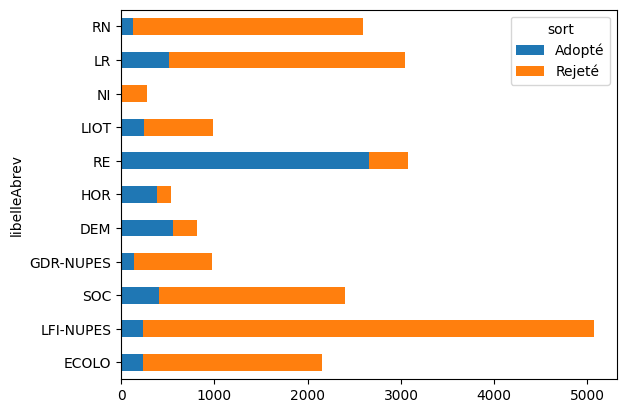

In [27]:
(
    amendements_sort_table
    [["Adopté", "Rejeté"]]
    .plot
    .barh(
        stacked=True
    )
)

In [28]:
(
    amendements_sort_table
    [["Adopté", "Rejeté"]]
    .pipe(lambda df: df.div(df.sum(axis=1), axis=0))
    # .plot
    # .barh(
    #     stacked=True
    # )
)

sort,Adopté,Rejeté
libelleAbrev,,
ECOLO,0.106314,0.893686
LFI-NUPES,0.045410,0.954590
SOC,0.169717,0.830283
GDR-NUPES,0.136550,0.863450
DEM,0.678091,0.321909
HOR,0.733962,0.266038
RE,0.865234,0.134766
LIOT,0.248731,0.751269
NI,0.033088,0.966912


<Axes: ylabel='libelleAbrev'>

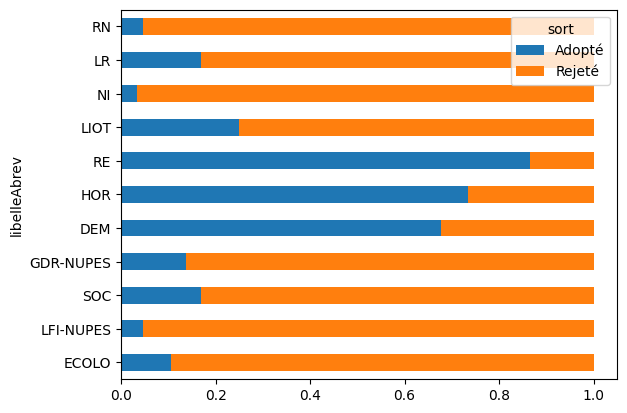

In [29]:
(
    amendements_sort_table
    [["Adopté", "Rejeté"]]
    .pipe(lambda df: df.div(df.sum(axis=1), axis=0))
    .plot
    .barh(
        stacked=True
    )
)

In [107]:
def find_scrutin(amendement):
    result = (
        scrutins
        .query('cr == @amendement.cr')
        .query('objet.str.contains(@amendement.numero, regex=False)')
    )
    
    if (len(result) > 0):
        return result.uid.to_list()[0]
    else:
        return np.nan

amendements_rn_seances = (
    amendements
    .query('libelleAbrev == "RN"')
    .query('not seance.isna()')
    .query('discussion_commune.isna()')
    .query('discussion_identique.isna()')
    .set_index('id')
    .assign(
        scrutin_pred = lambda df: df.apply(find_scrutin, axis=1)
    )
)

amendements_rn_seances

,numero,texte,signataire,organe,dispositif,seance,sort,discussion_commune,discussion_identique,libelleAbrev,cr,url_seance,dispositif_plaintext,scrutin
id,,,,,,,,,,,,,,
AMANR5L16PO791932BTC0912P0D1N000043,43,PIONANR5L16BTC0912,PA793608,PO800520,"<p style=""text-align: justify;"">Dans un d&#233...",RUANR5L16S2023IDS26863,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N172,https://www.assemblee-nationale.fr/dyn/16/comp...,Dans un délai de six mois à compter de la prom...,VTANR5L16V1153
AMANR5L16PO791932BTC0912P0D1N000040,40,PIONANR5L16BTC0912,PA793608,PO800520,"<p style=""text-align: justify;"">&#192;&#160;l&...",RUANR5L16S2023IDS26863,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N172,https://www.assemblee-nationale.fr/dyn/16/comp...,"À l’alinéa 4, après le mot :« par »,insérer le...",NaN
AMANR5L16PO791932BTC0912P0D1N000042,42,PIONANR5L16BTC0912,PA793608,PO800520,"<p style=""text-align: justify;"">Dans un d&#233...",RUANR5L16S2023IDS26863,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N172,https://www.assemblee-nationale.fr/dyn/16/comp...,Dans un délai de six mois à compter de la prom...,VTANR5L16V1152
AMANR5L16PO791932BTC0912P0D1N000041,41,PIONANR5L16BTC0912,PA793608,PO800520,"<p style=""text-align: justify;"">Au 1&#176;&#16...",RUANR5L16S2023IDS26863,Retiré,NaN,NaN,RN,CRSANR5L16S2023O1N172,https://www.assemblee-nationale.fr/dyn/16/comp...,Au 1° du II de l’article L. 162‑58 du code de ...,NaN
AMANR5L16PO791932B1011P0D1N000094,94,PIONANR5L16B1011,PA794582,PO800520,"<p style=""text-align: justify;"">&nbsp;</p><p s...",RUANR5L16S2023IDS27040,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N230,https://www.assemblee-nationale.fr/dyn/16/comp...,"À l’alinéa 2, substituer au nombre :« 3 500 »...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMANR5L16PO791932B0760P0D1N014172,14172,PRJLANR5L16B0760,PA793374,PO800520,"<p style=""text-align: justify;"">Compl&#233;ter...",RUANR5L16S2023IDS26790,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N144,https://www.assemblee-nationale.fr/dyn/16/comp...,Compléter l’alinéa 4 par les mots :« en foncti...,VTANR5L16V959
AMANR5L16PO791932B0760P0D1N016608,16608,PRJLANR5L16B0760,PA795778,PO800520,"<p style=""text-align: justify;"">I. - Il est in...",RUANR5L16S2023IDS26804,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N155,https://www.assemblee-nationale.fr/dyn/16/comp...,I. - Il est institué une contribution addition...,VTANR5L16V1092
AMANR5L16PO791932B0760P0D1N016634,16634,PRJLANR5L16B0760,PA795778,PO800520,"<p style=""text-align: justify;"">L&#8217;articl...",RUANR5L16S2023IDS26795,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N149,https://www.assemblee-nationale.fr/dyn/16/comp...,L’article L. 137‑11‑1 du code de la sécurité s...,VTANR5L16V985


In [110]:
(
    amendements_rn_seances
    .query('scrutin.isna()')
)

,numero,texte,signataire,organe,dispositif,seance,sort,discussion_commune,discussion_identique,libelleAbrev,cr,url_seance,dispositif_plaintext,scrutin
id,,,,,,,,,,,,,,
AMANR5L16PO791932BTC0912P0D1N000040,40,PIONANR5L16BTC0912,PA793608,PO800520,"<p style=""text-align: justify;"">&#192;&#160;l&...",RUANR5L16S2023IDS26863,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N172,https://www.assemblee-nationale.fr/dyn/16/comp...,"À l’alinéa 4, après le mot :« par »,insérer le...",NaN
AMANR5L16PO791932BTC0912P0D1N000041,41,PIONANR5L16BTC0912,PA793608,PO800520,"<p style=""text-align: justify;"">Au 1&#176;&#16...",RUANR5L16S2023IDS26863,Retiré,NaN,NaN,RN,CRSANR5L16S2023O1N172,https://www.assemblee-nationale.fr/dyn/16/comp...,Au 1° du II de l’article L. 162‑58 du code de ...,NaN
AMANR5L16PO791932B1011P0D1N000094,94,PIONANR5L16B1011,PA794582,PO800520,"<p style=""text-align: justify;"">&nbsp;</p><p s...",RUANR5L16S2023IDS27040,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N230,https://www.assemblee-nationale.fr/dyn/16/comp...,"À l’alinéa 2, substituer au nombre :« 3 500 »...",NaN
AMANR5L16PO791932BTC0909P0D1N000065,65,PIONANR5L16BTC0909,PA794678,PO800520,"<p style=""text-align: justify;"">Compl&#233;ter...",RUANR5L16S2023IDS26860,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N170,https://www.assemblee-nationale.fr/dyn/16/comp...,Compléter cet article par les mots : « ainsi q...,NaN
AMANR5L16PO791932BTC0909P0D1N000066,66,PIONANR5L16BTC0909,PA794678,PO800520,"<p style=""text-align: justify;"">&#192; l&#8217...",RUANR5L16S2023IDS26858,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N167,https://www.assemblee-nationale.fr/dyn/16/comp...,"À l’alinéa 6, après la seconde occurrence du m...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMANR5L16PO791932B0760P0D1N014222,14222,PRJLANR5L16B0760,PA793608,PO800520,"<p style=""text-align: justify;"">Apr&#232;s l&#...",RUANR5L16S2023IDS26791,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N145,https://www.assemblee-nationale.fr/dyn/16/comp...,"Après l’alinéa 5, insérer l’alinéa suivant :« ...",NaN
AMANR5L16PO791932B0760P0D1N014243,14243,PRJLANR5L16B0760,PA720822,PO800520,"<p style=""text-align: justify;"">Compl&#233;ter...",RUANR5L16S2023IDS26791,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N145,https://www.assemblee-nationale.fr/dyn/16/comp...,Compléter l’alinéa 6 par la phrase suivante : ...,NaN
AMANR5L16PO791932B0760P0D1N020085,20085,PRJLANR5L16B0760,PA794314,PO800520,"<p style=""text-align: justify;"">Dans un d&#233...",RUANR5L16S2023IDS26787,Rejeté,NaN,NaN,RN,CRSANR5L16S2023O1N141,https://www.assemblee-nationale.fr/dyn/16/comp...,Dans un délai de six mois à compter de la prom...,NaN


In [109]:
amendements_rn_seances.to_csv('out/rn_amendements.csv', index=False)

In [125]:
interventions = (
    pd
    .read_csv('out/interventions.csv')
    .join(reunions[['cr']], on='seance')
    .assign(
        url_seance = lambda df: df.cr.apply(lambda id: f'https://www.assemblee-nationale.fr/dyn/16/comptes-rendus/seance/{id}'),
    )
    .assign(
        url_intervention = lambda df: df.url_seance+'#'+df.id_syceron.astype(str),
    )
)

interventions

,id_syceron,acteur,code_grammaire,code_style,stime,texte,seance,mots,cr,url_seance,url_intervention
0,2845790,PA721908,OUV_SEAN_2_1,NORMAL,919.71,La séance est ouverte.,RUANR5L16S2022IDS26244,4,CRSANR5L16S2022E1N032,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
1,2845795,PA721908,ODJ_APPEL_DISCUSSION,NORMAL,922.29,"L’ordre du jour appelle la discussion, sur le ...",RUANR5L16S2022IDS26244,27,CRSANR5L16S2022E1N032,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
2,2845797,PA721908,PAROLE_GENERIQUE,NORMAL,931.96,"La parole est à M. Jean-Renvé Cazeneuve, rap...",RUANR5L16S2022IDS26244,13,CRSANR5L16S2022E1N032,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
3,2845798,PA719472,PAROLE_GENERIQUE,NORMAL,957.22,Je suis ravi de vous présenter les conclusion...,RUANR5L16S2022IDS26244,87,CRSANR5L16S2022E1N032,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
4,2845799,PA642847,INTERRUPTION_1_10,NORMAL,981.52,Un Lorrain !,RUANR5L16S2022IDS26244,3,CRSANR5L16S2022E1N032,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
...,...,...,...,...,...,...,...,...,...,...,...
156971,2944887,PA793382,INTERRUPTION_1_10,NORMAL,9539.76,Et c’est d’acheter du charbon à l’Allemagne ?,RUANR5L16S2023IDS26598,8,CRSANR5L16S2023O1N083,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
156972,2944889,PA720908,SCRUT_PUB_ADT_1_2,NORMAL,9549.08,Je mets aux voix l’amendement n 3039.,RUANR5L16S2023IDS26598,8,CRSANR5L16S2023O1N083,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
156973,2944891,PA720908,SCRUT_PUB_ADT_1_4,NORMAL,9554.61,Voici le résultat du scrutin : Nombre...,RUANR5L16S2023IDS26598,170,CRSANR5L16S2023O1N083,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...
156974,2944893,PA720908,FIN_SEAN_1_0,NORMAL,9555.48,La suite de la discussion est renvoyée à la ...,RUANR5L16S2023IDS26598,11,CRSANR5L16S2023O1N083,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...


In [126]:
interventions_rn = (
    interventions
    .query('acteur.isin(@deputes.index)')
    .join(deputes[['nom', 'civ']], on='acteur')
)

interventions_rn

,id_syceron,acteur,code_grammaire,code_style,stime,texte,seance,mots,cr,url_seance,url_intervention,nom,civ
250,2846125,PA794954,PAROLE_GENERIQUE,NORMAL,4479.19,"Comme hier, l’extrême gauche, la NUPES oubli...",RUANR5L16S2022IDS26244,31,CRSANR5L16S2022E1N032,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...,Salmon,M.
252,2846190,PA794954,PAROLE_GENERIQUE,NORMAL,4494.44,"Certes, celles-ci sont maigres, mais la motion...",RUANR5L16S2022IDS26244,53,CRSANR5L16S2022E1N032,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...,Salmon,M.
254,2846129,PA794954,PAROLE_GENERIQUE,NORMAL,4516.35,"Monsieur le ministre Attal, je vous mets au de...",RUANR5L16S2022IDS26244,38,CRSANR5L16S2022E1N032,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...,Salmon,M.
258,2846131,PA794954,PAROLE_GENERIQUE,NORMAL,4530.05,"Nous avons fait beaucoup de propositions, que ...",RUANR5L16S2022IDS26244,30,CRSANR5L16S2022E1N032,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...,Salmon,M.
288,2846198,PA794562,PAROLE_GENERIQUE,NORMAL,5393.41,Sur le fondement de l’article 70-3. Je souhait...,RUANR5L16S2022IDS26244,39,CRSANR5L16S2022E1N032,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...,Ballard,M.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156962,2944883,PA793382,PAROLE_GENERIQUE,NORMAL,9384.75,Cela vaut aussi pour d’autres collègues. Le s...,RUANR5L16S2023IDS26598,38,CRSANR5L16S2023O1N083,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...,Taché de la Pagerie,M.
156964,2945096,PA795778,PAROLE_GENERIQUE,NORMAL,9410.20,"Vous ne m’avez pas répondu, madame Pannier-Ru...",RUANR5L16S2023IDS26598,157,CRSANR5L16S2023O1N083,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...,Tanguy,M.
156966,2945099,PA795778,PAROLE_GENERIQUE,NORMAL,9466.82,...tandis qu’un mix avec moins d’énergies ren...,RUANR5L16S2023IDS26598,54,CRSANR5L16S2023O1N083,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...,Tanguy,M.
156969,2944941,PA793382,INTERRUPTION_1_10,NORMAL,9500.31,"Honteux ! Vous êtes malhonnête, madame !",RUANR5L16S2023IDS26598,7,CRSANR5L16S2023O1N083,https://www.assemblee-nationale.fr/dyn/16/comp...,https://www.assemblee-nationale.fr/dyn/16/comp...,Taché de la Pagerie,M.


In [127]:
interventions_rn.to_csv('out/rn_interventions.csv', index=False)

In [42]:
interventions_rn_stats = (
    interventions_rn
    .assign(
        parole = lambda df: df.code_grammaire.str.contains('PAROLE'),
        interruption = lambda df: df.code_grammaire.str.contains('INTERRUPTION')
    )
    .groupby('nom')
    .agg({
        'civ' : 'first', 
        'mots': ['sum', 'mean'],
        'texte': ['count'],
        'seance': lambda s: len(s.unique()),
        'parole': 'sum',
        'interruption': 'sum'
    })
    .sort_values(('mots', 'sum'), ascending=False)
)

interventions_rn_stats

civ    mots             texte   seance parole  \
                      first     sum        mean count <lambda>    sum   
nom                                                                     
Chenu                    M.  102950   20.499801  5022      106   2957   
Laporte                 Mme   76744   19.355359  3965       42   2594   
Tanguy                   M.   62503   71.350457   876      108    528   
Jacobelli                M.   32243   30.736892  1049      128    284   
Le Pen                  Mme   31050   62.100000   500       81    298   
...                     ...     ...         ...   ...      ...    ...   
Beaurain                 M.    1038   31.454545    33       18      6   
Frigout                 Mme    1018  127.250000     8        4      8   
Bovet                    M.    1006   91.454545    11        6      9   
Girard                   M.     817  163.400000     5        4      4   
Da Conceicao Carvalho   Mme     593  148.250000     4        2      4   

                      interruption  
                               sum  
nom                                 
Chenu                          555  
Laporte                        224  
Tanguy                         348  
Jacobelli                      765  
Le Pen                         202  
...                            ...  
Beaurain                        27  
Frigout                          0  
Bovet                            2  
Girard                           1  
Da Conceicao Carvalho            0  

[88 rows x 7 columns]

In [43]:
interventions_rn_stats.to_csv('out/rn_interventions_stats.csv')

In [48]:
deputes.civ.value_counts().div(len(deputes))

M.     0.622222
Mme    0.377778
Name: civ, dtype: float64

In [51]:
interventions_rn_stats_civ = (
    interventions_rn
    .assign(
        parole = lambda df: df.code_grammaire.str.contains('PAROLE'),
        interruption = lambda df: df.code_grammaire.str.contains('INTERRUPTION')
    )
    .groupby('civ')
    .agg({
        'mots': ['sum', 'mean'],
        'texte': ['count'],
        'seance': lambda s: len(s.unique()),
        'parole': 'sum',
        'interruption': 'sum'
    })
)

interventions_rn_stats_civ

mots            texte   seance parole interruption
        sum      mean  count <lambda>    sum          sum
civ                                                      
M.   598194  44.97023  13302      302   6834         4956
Mme  261244  42.21102   6189      257   3986         1056

In [52]:
interventions_rn_stats_civ_pct = (
    interventions_rn_stats_civ
    .div(
        interventions_rn_stats_civ.sum()
    )
)

interventions_rn_stats_civ_pct

mots               texte   seance    parole interruption
          sum      mean     count <lambda>       sum          sum
civ                                                              
M.   0.696029  0.515825  0.682469  0.54025  0.631608     0.824351
Mme  0.303971  0.484175  0.317531  0.45975  0.368392     0.175649

In [61]:
(
    interventions
    .join(pd.read_csv('out/acteurs.csv').set_index('uid'), on='acteur')
    .assign(
        parole = lambda df: df.code_grammaire.str.contains('PAROLE'),
        interruption = lambda df: df.code_grammaire.str.contains('INTERRUPTION')
    )
    .groupby('civ')
    .agg({
        'mots': ['sum', 'mean'],
        'texte': ['count'],
        'seance': lambda s: len(s.unique()),
        'parole': 'sum',
        'interruption': 'sum'
    })
    .pipe(
        lambda df: (
            df
            .div(df.sum())
        )
    )
)


mots               texte   seance    parole interruption
          sum      mean     count <lambda>       sum          sum
civ                                                              
M.   0.612773  0.585858  0.527997      0.5  0.508468     0.723191
Mme  0.387227  0.414142  0.472003      0.5  0.491532     0.276809